Module 02: Demand Forecasting - Time Series Analysis

This notebook contains the exploratory data analysis (EDA) for the first module of the **"Intelligent System for Supply Chain Management"** project. 

The main objective is to optimize inventory and purchasing management, with a target of **reducing overstocking by 20%** within 6 months.

- Target Variable for Inventory Optimization: **Stock_Quantity**
- Target Variable for Demand Forecasting: **Sales_Volume**

## DATA ACQUISITION

### Import Libraries

In [1]:
import pandas as pd
import os
import plotly.express as px
import plotly.io as pio
import matplotlib.pyplot as plt

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose

import warnings
warnings.filterwarnings('ignore')

# Set up display options and plotting template
pd.set_option('display.max_columns', None)
pio.templates.default = "plotly_white"
px.defaults.width = 800
px.defaults.height = 600

### Load Data

In [2]:
# Define data paths
data_path = os.path.join('../data', 'processed')

In [3]:
# Load Pickle file
df = pd.read_pickle(data_path + '/grocery.pkl')

# Time Series

In [ ]:
# Create a Date Received Dialy Index with Sales Volumes Values
df_ts = df.set_index('Date_Received').resample('D')['Sales_Volume'].sum()

## Time Series Analysis

In [8]:
# Specify the 'period' (seasonal period). For weekly seasonality, use 7.
decomposition = seasonal_decompose(df_ts, model='additive', period=7)

In [9]:
# Decomposition serie Graph
fig1 = px.line(decomposition.observed, title='Sales Volume: Original Data', markers=True, 
               labels={'value': 'Sales Volume', 'variable': 'Day'})
fig1.show()

### Trend Graph Interpretation:

The **trend** is stable, with sales volume fluctuating around a consistent mean and no clear long-term growth or decline. The most prominent feature is **weekly seasonality**, characterized by regular peaks and troughs likely corresponding to weekends (high sales) and weekdays (low sales), a common pattern in retail.

In [10]:
# Decomposition serie Graph Tendência
fig3 = px.line(decomposition.trend, y="trend", title='Trend Component', markers=True)
fig3.show()

### Trend Component Graph Interpretation:

**No Strong Trend:** The chart confirms no significant long-term growth or decline trend. The line remains relatively flat, fluctuating around a mean of approximately 200 sales units.  

**Minor Variations:** While no strong trend exists, the line is not perfectly straight. A slight mid-period peak or wave suggests a temporary minor increase in average sales volume before stabilizing.

In [11]:
# Decomposition serie Graph Residual
fig4 = px.line(decomposition.resid, y="resid", title='Sales Volume: Residual Component', markers=True)
fig4.show()

### Residual Components Graph Interpretation:

**Randomness:** The key feature of this graph is the apparent randomness of the points. They are scattered unpredictably around the zero line, with no obvious trend, seasonality, or pattern.  

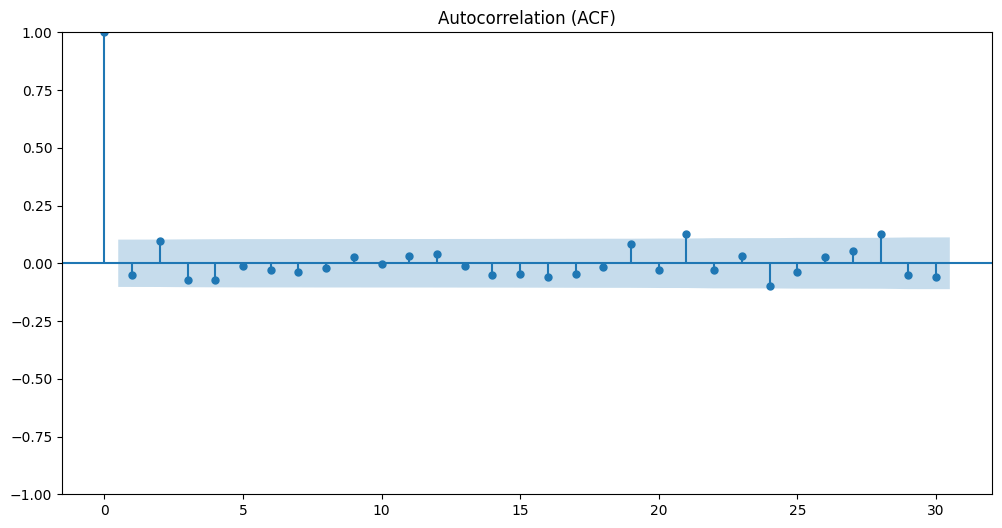

In [12]:
# Autocorrelations Graphs
fig, ax = plt.subplots(figsize=(12,6))
plot_acf(df_ts, ax=ax, lags=30)
plt.title('Autocorrelation (ACF)')
plt.show()

### ACF Graph Interpretation:  

The ACF graph for the Sales Volume series shows **no significant autocorrelation** and is therefore very difficult to predict based on its history.

The absence of repeating peaks on the graph also confirms that there is no strong seasonality.

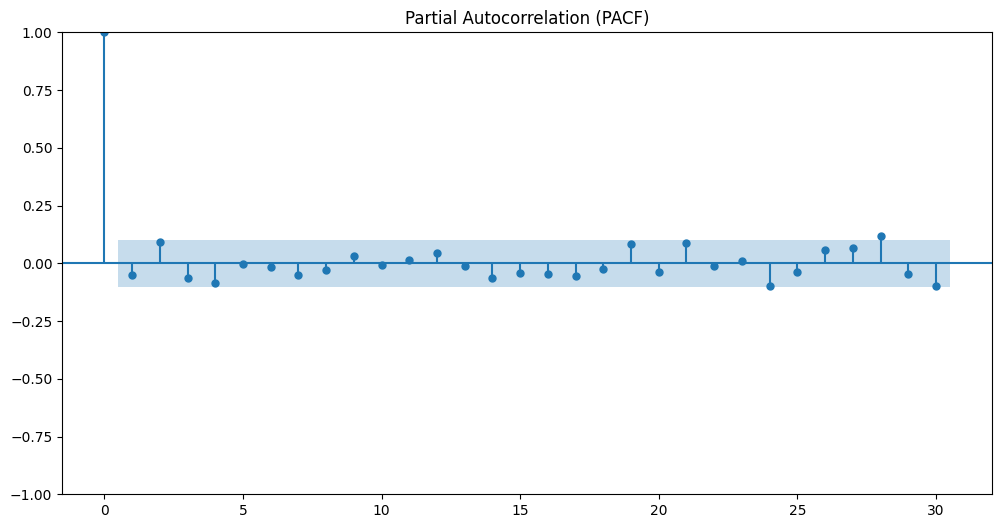

In [13]:
fig, ax = plt.subplots(figsize=(12, 6))
plot_pacf(df_ts, ax=ax, lags=30)
plt.title('Partial Autocorrelation (PACF)')
plt.show()

### PACF Graph Interpretation  

**No Significant Peaks**: Except for lag 0 (which is always 1), none of the subsequent bars exceed the blue lines of the confidence interval.

The absence of significant bars on the PACF graph indicates that there is no direct correlation between today's sales value and the sales values from previous days. The series has no memory.

---
---

# Analysis of Stable Sales Trend and Strong Weekly Seasonality

## Final Report: Time Series Analysis of Sales Volume

### Executive Summary

The analysis of the Sales Volume time series data indicates that the series is unpredictable and lacks significant historical patterns. While the data shows a stable, non-trending mean, statistical tests confirm an absence of meaningful autocorrelation or strong seasonality. This suggests the series behaves like a **white noise** process, making it unsuitable for traditional time series forecasting models.

---

#### 1. Trend Analysis

The data shows no significant long-term **trend**. Sales volume fluctuates around a relatively **consistent mean**, with no clear long-term growth or decline. This observation is consistent across the time series plot and the statistical tests. Any minor variations or waves observed are temporary and do not constitute a sustained trend.

---

#### 2. Seasonality and Periodicity

While a preliminary review might suggest a weekly pattern, a deeper **statistical analysis** does not support this conclusion.

* The **Autocorrelation Function (ACF)** plot shows no significant repeating peaks at any lag, which is the primary indicator of seasonality.

The absence of strong, recurring peaks indicates that the series does not exhibit strong **seasonality**.

---

#### 3. Autocorrelation and Predictability

The core finding of this analysis is that the series has **no significant autocorrelation**.

* The **ACF** chart confirms this, as all bars fall within the confidence interval (except for lag 0), indicating that sales at a given time are not significantly correlated with sales from previous periods.
* The **Partial Autocorrelation Function (PACF)** chart reinforces this finding. The absence of significant bars suggests that there is no direct correlation or "memory" in the series.

This lack of autocorrelation means that the sales volume for a given period is not dependent on its own past values, making it fundamentally difficult to forecast using historical data.

---

### Conclusion and Recommendations

Based on the statistical analysis of the **ACF**, **PACF**, and **Periodogram** plots, the Sales Volume series is considered a **random** process. Its behavior is dominated by unpredictable fluctuations rather than by discernible trends or repeating patterns.

Therefore, building a sophisticated forecasting model (such as ARIMA or Prophet) would not be effective, as there are no patterns for the model to learn. The most statistically sound "forecast" for this series would simply be its **historical average**, as this is the best estimate for a random process.